2986
2986
789
789
789
789
0.07083190211939508
0 0.0001850460509631352
1 5.8121382167055754e-05
2 0.00017298836465702496
3 0.00010620080442448639
4 0.0002639017662548975
5 0.00013633658059541807
6 0.000129320906339293
7 0.00029433837925850237
8 0.0007420833217159214
9 5.2296892345184766e-05
10 0.0001586474245967804
11 0.00027911506942359656
12 0.00038819632384733165
13 0.002095728308305212
14 9.210192407234931e-05
15 0.00017677375240916847
16 0.00013894504575947145
17 0.00035545941324659013
18 1.1882761001426016e-05
19 0.00025369150365330364
20 7.996159621961764e-05
21 0.0004507573708177831
22 0.00011902952395747389
23 0.0001992465181126304
24 0.00018304063518884248
25 0.0003738005879979585
26 0.00025556361052146904
27 4.0644745215027876e-05
28 0.00019184174046937293
29 0.0001624698692171975
30 0.0005294404190430232
31 9.079179218617341e-05
32 0.0001143414224313808
33 6.303880065315283e-05
34 0.0003786769197023558
35 7.598711511037257e-05
36 9.03382390519008e-05
37 0.0004808823685657682

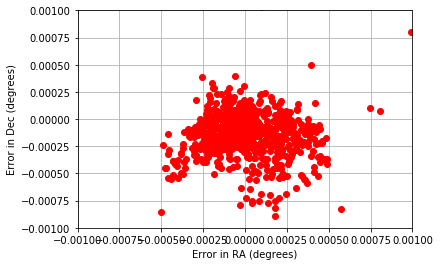

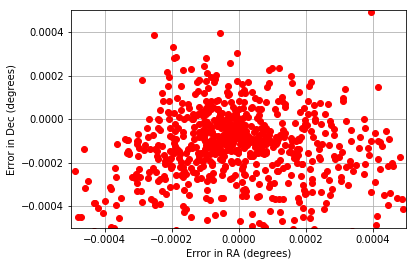

In [6]:
import sys
import math as m
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

#Import GAIA data as lists of RA and DEC

txt = open("Agaiadata.csv")

counter = 0
gaia_ra = []
gaia_dec = []
for line in txt :
    elements = line.split(";")
    if counter != 0 :
        ra = elements[1]
        ra = float(ra)
        gaia_ra.append(ra)
        dec = elements[3]
        dec = float(dec)
        gaia_dec.append(dec)
    counter =+ 1 
    
print (len(gaia_ra))
print (len(gaia_dec))

#Import x,y pixel positions of detected sources

file = fits.open("Aaxy.fits")
data = file[1].data
 
x_list = []
y_list = []
for line in data:
    valuex = line[0]
    valuex = float(valuex)
    valuey = line[1]
    valuey = float(valuey)
    x_list.append(valuex)
    y_list.append(valuey)
    
print (len(x_list))
print (len(y_list))

#Convert pixel coordinates to world coordinates

x_world = []
y_world = []
w = WCS("Anew-image.fits")
for a in range(len(x_list)):
    x = x_list[a]
    y = y_list[a]
    lon, lat = w.all_pix2world(x, y, 1) #0 or 1 here? IMPORTANT!
    lon = float(lon)
    lat = float(lat)
    x_world.append(lon)
    y_world.append(lat)
    
print (len(x_world))
print (len(y_world))
    
#Great Circle Distance - separation function from Astropy - TEST 

c1 = SkyCoord(gaia_ra[0], gaia_dec[0], frame='icrs', unit = 'deg')
c2 = SkyCoord(x_world[0], y_world[0], frame='icrs', unit = 'deg')
sep = c1.separation(c2)
print (sep.deg)

#A loop that selects the counterpart based on the smallest distance and calculates errors 
#in DEC and RA
f = open("outputA.txt", 'w')
results  = []
raerror = []
decerror = []
for a in range(len(x_world)):
    xsource = x_world[a]
    ysource = y_world[a]
    temp = []
    for b in range(len(gaia_ra)):
        xgaia = gaia_ra[b]
        ygaia = gaia_dec[b]
        c1 = SkyCoord(xgaia, ygaia, frame='icrs', unit = 'deg')
        c2 = SkyCoord(xsource, ysource, frame='icrs', unit = 'deg')
        sep = c1.separation(c2)
        sep = sep.deg
        temp.append(sep)
    match = min(temp)
    print (a, match)
    index_number = temp.index(match)
    results.append(index_number)
    ra_err = gaia_ra[index_number] - x_world[a]
    dec_err = gaia_dec[index_number] - y_world[a]
    rastr = str(ra_err)+", "
    decstr = str(dec_err)+", "
    f.write(rastr)
    f.write(decstr)
    f.write("\n")
    raerror.append(ra_err)
    decerror.append(dec_err)
f.close()

plt.plot(raerror, decerror, 'ro')
plt.axis([ -0.001, 0.001, -0.001, 0.001])
plt.xlabel("Error in RA (degrees)")
plt.ylabel("Error in Dec (degrees)")
plt.grid(True)
plt.savefig("Agraph.png")
plt.show()

plt.plot(raerror, decerror, 'ro')
plt.axis([ -0.0005, 0.0005, -0.0005, 0.0005])
plt.xlabel("Error in RA (degrees)")
plt.ylabel("Error in Dec (degrees)")
plt.grid(True)
plt.savefig("Agraphzoom.png")
plt.show()